## 选择性搜索算法的简洁实现

基于opencv

In [5]:
import cv2
import matplotlib.pyplot as plt

import time
import random

In [6]:
# load the input image

img_path='./bird.jpg'
image = cv2.imread(img_path,cv2.IMREAD_COLOR)
#  not use image = cv2.imread(img_path)

print(type(image))
image.shape

<class 'numpy.ndarray'>


(183, 275, 3)

In [7]:
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [8]:
# initialize OpenCV's selective search implementation and set the
ss.setBaseImage(image)


In [9]:
# choice select search version
ss.switchToSelectiveSearchFast()



# fast but less accurate version of selective search
# ss.switchToSelectiveSearchFast()
	
# slower but more accurate version
# ss.switchToSelectiveSearchQuality()

In [10]:
start = time.time()


# (x,y,w,h)
rects = ss.process()

end = time.time()

print("[info] selective search algorithm took %.2f seconds" % (end - start) )
print("[INFO] total region proposals is: {}".format(len(rects)))

[info] selective search algorithm took 0.41 seconds
[INFO] total region proposals is: 779


In [11]:
# 增强边界框的色彩
rec=rects.copy()
rec[:, 2] += rec[:, 0]
rec[:, 3] += rec[:, 1]

In [12]:
print(rects[:1])
print(rec[:1])

[[208   0  67  51]]
[[208   0 275  51]]


画出 region proposal 

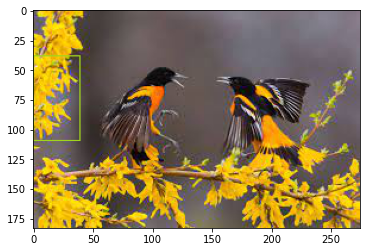

In [19]:
for i in range(0, len(rects), 100):
    output = image.copy()
    for (x, y, w, h) in rects[i:i + 100]:
        color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 1)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    cv2.imwrite('./bird_bbox.jpg',output)

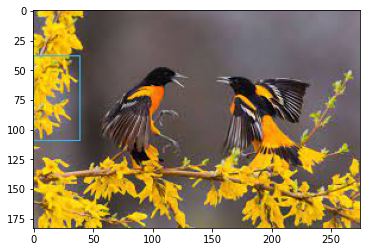

In [20]:

for i in range(0, len(rec), 100):
	# clone the original image so we can draw on it
	output = image.copy()
	# loop over the current subset of region proposals
	for (x, y, w, h) in rects[i:i + 100]:
		# draw the region proposal bounding box on the image
		color = [random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (x, y), (x + w, y + h), color, 1)
	# show the output image
	tmp=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
	plt.imshow(tmp)
	# cv2.imwrite('bird_bbox_rec.jpg',output)
    
    
    # cv2.imshow("Output", output)
	# key = cv2.waitKey(0) & 0xFF
	# # if the `q` key was pressed, break from the loop
	# if key == ord("q"):
	# 	break

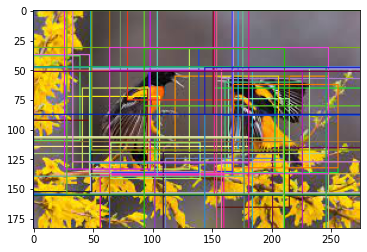

In [22]:
for i in range(0, len(rec), 100):
    output = image.copy()
    for (x, y, w, h) in rects[i:i + 100]:
        color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 1)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 其它

关于cv2.imshow(image)显示与plt.imshow(image)显示有一定的颜色差异，

原因：
>Because OpenCV stores images in BGR order instead of RGB


解决：

tmp=cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(tmp)

In [45]:
img=cv2.imread('./bird.jpg')
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(183, 275, 3)


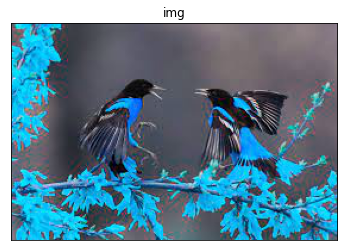

In [52]:
# plt

plt.imshow(img)

plt.title('img')
plt.xticks([]),plt.yticks([])

plt.show()

In [54]:
# cv2

cv2.imshow('image',img)
cv2.waitKey(0)
# cv2.destroyWindow()

-1

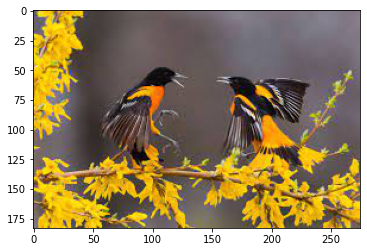

In [55]:
# BGR TO RGB

tmp=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(tmp)